# Part 2: Penguin

In this part of the assignment you will analyze a dataset of measurements about three different species of Penguins. 

**Learning objectives.** You will:
1. Train and test a linear model using ordinary least squares regression. 
2. Use a One-Hot-Encoding to incorporate categorical features as inputs to a linear predictive model.
3. Inspect model coefficients and scatterplot visualizations to interpret a change in model coefficients for two different linear models.

We begin by importing the dataset and providing a visualization of how the numerical features vary by species. 

C:\Users\micha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


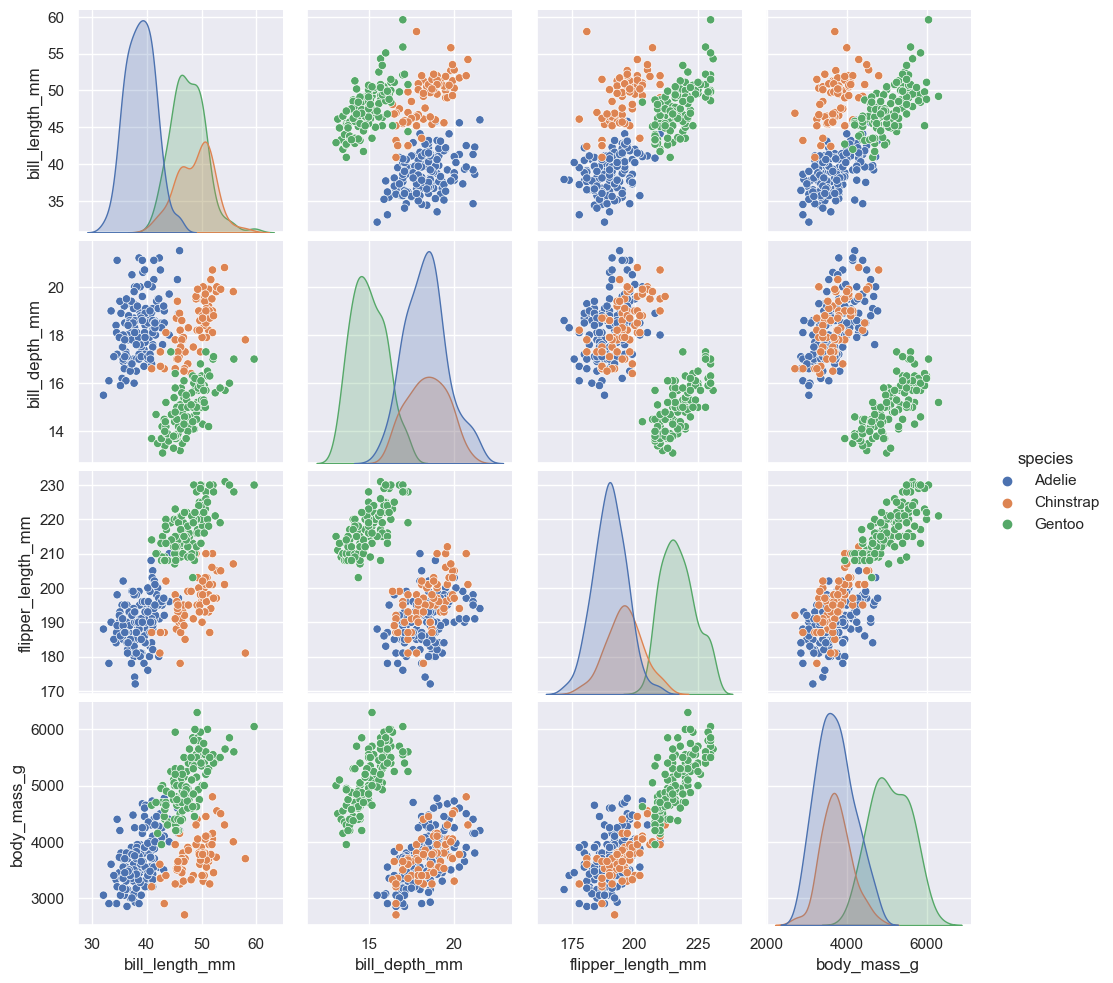

In [2]:
# Run but do not modify this code

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()

# Only 11 penguins out of over 300 are missing any data;
# we simply drop those here
penguins = sns.load_dataset("penguins").dropna()
sns.pairplot(data=penguins, hue="species")
penguins.head()

## Task 1

We will build predictive models using `bill_length_mm`, `bill_depth_mm`, `species`, and `sex` as inputs and attempting to predict `flipper_length_mm`. The code below gets the appropriate columns of data and converts them to NumPy arrays for you, inputs as `X` and predictive targets as `y`.

Randomly split the input data into a [train and test partition](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), with 30% of the data reserved for testing. Use a random seed of `2024` for reproducibility of the results.

In [3]:
from sklearn.model_selection import train_test_split

X = penguins[["bill_length_mm", "bill_depth_mm", "species", "sex"]].values
y = penguins["flipper_length_mm"].values

# Finish code for task 1 code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2024)

## Task 2

Run the following cell to zoom in on visualizing the relationship between `bill_length_mm`, `bill_depth_mm` and `flipper_length_mm`. You should observe (perhaps unsurprisingly) that penguins with larger bills tend to have longer flippers.

C:\Users\micha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\micha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


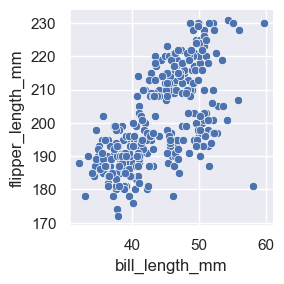

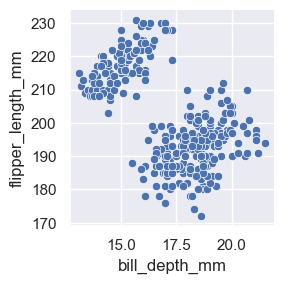

In [4]:
# Run but do not modify this code
sns.relplot(data=penguins, x="bill_length_mm", y="flipper_length_mm", height=3)
sns.relplot(data=penguins, x="bill_depth_mm", y="flipper_length_mm", height=3)

Build a linear predictive model using [ordinary least squares regression](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares) fit on the training data to predict `flipper_length_mm` as a function of `bill_depth_mm` and `bill_depth_mm` only (do not use `species` or `sex` for this task). Use the model to make predictions on the test data (again, without using `species` or `sex` for this task), and evaluate the [root mean squared error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.root_mean_squared_error.html#sklearn.metrics.root_mean_squared_error) of the predictions.

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

X_train_subset = X_train[:, :2] 
X_test_subset = X_test[:, :2] #only need fliper length and bill depth

ols_model = LinearRegression()
ols_model.fit(X_train_subset, y_train)

y_test_pred = ols_model.predict(X_test_subset)

test_RMSE = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Test RMSE: {test_RMSE:.4f}")
coefficients = ols_model.coef_
print(f"Coefficients: {coefficients}")

Test RMSE: 8.2055
Coefficients for the model: [ 1.38602826 -3.08142116]


## Task 3

One way to improve the performance of our regression model for the `flipper_length_mm` prediction task is to include the `species` and `sex` features. That is, we now want to model/predict `flipper_length_mm` as a function of `bill_length_mm`, `bill_depth_mm`, `species`, and `sex`. However, the `species` and `sex` features are both categorical. 

Compute a [one hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) of the `species` and `sex` data, combine that with the numerical `bill_length_mm` and `bill_depth_mm` data, and fit a linear regression model using ordinary least squares regression on the training data with all of these features. Again use the model to make predictions on the test data, and evaluate the [root mean squared error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.root_mean_squared_error.html#sklearn.metrics.root_mean_squared_error) of the predictions.

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import numpy as np

X_num_train = X_train[:, :2]
X_num_test = X_test[:, :2]

X_cat_train = X_train[:, 2:] 
X_cat_test = X_test[:, 2:]

encoder = OneHotEncoder(drop='first', sparse_output=False)

X_cat_train_encoded = encoder.fit_transform(X_cat_train)
X_cat_test_encoded = encoder.transform(X_cat_test)
X_train_combined = np.hstack((X_num_train, X_cat_train_encoded))
X_test_combined = np.hstack((X_num_test, X_cat_test_encoded))

ols_model = LinearRegression()
ols_model.fit(X_train_combined, y_train)

y_test_pred = ols_model.predict(X_test_combined)

test_RMSE = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Test RMSE: {test_RMSE:.4f}")
coefficients = ols_model.coef_
print(f"Coefficients: {coefficients}")

Test RMSE: 5.3843
Coefficients: [ 0.44608943  1.33712979  0.87485807 27.34123107  3.38728718]


## Task 4

You should have observed that incorporating `species` and `sex` features improved the quality of our predictions for `flipper_length_mm`. Examine the model coefficients for the original model (not incorporating `species` or `sex`) from task 2 versus the model coefficients from the combined model in task 3. You should observe that the task 2 model has a negative coefficient for `bill_depth_mm` (meaning the model predicts penguins with deeper bills will have shorter flippers), but the task 3 model has a positive coefficient for `bill_depth_mm` (meaning the model predicts penguins with deeper bills will have longer flippers). What gives?

Run the code below to generate two visualizations. The first is a scatter plot of `bill_depth_mm` on the horizontal x-axis and `flipper_length_mm` on the vertical y-axis, with the points colored and shaped by their `sex`. The second is the same scatter plot but with the points colored and shaped by their `species`. 

Referring to the visualizations to justify your answer, explain why the model coefficient for `bill_depth_mm` changed from being negative in task 2 to positive in task 3.

C:\Users\micha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\micha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


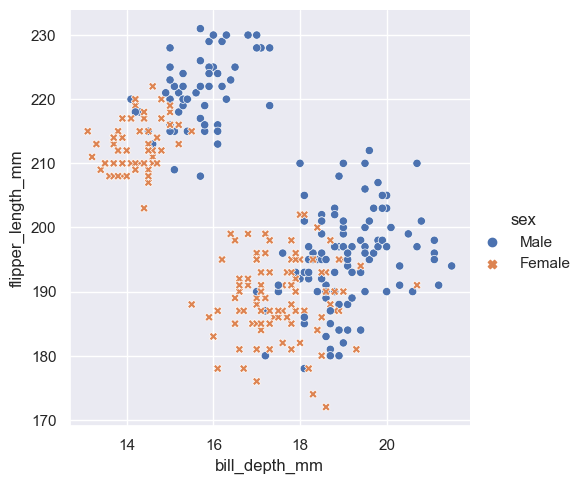

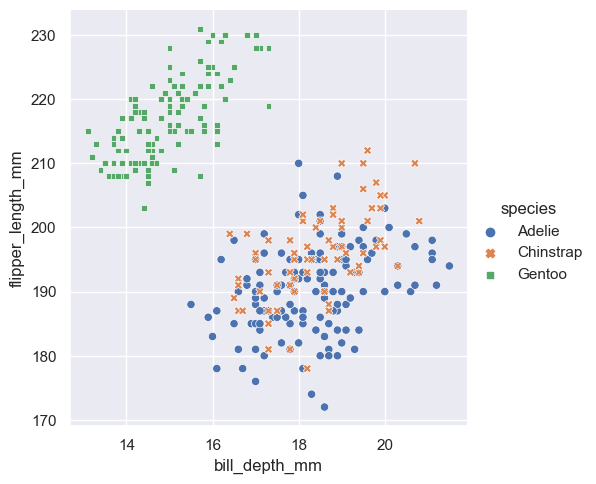

In [8]:
# Run but do not modify this code

sns.relplot(data=penguins, x="bill_depth_mm", y="flipper_length_mm", hue="sex", style="sex")
sns.relplot(data=penguins, x="bill_depth_mm", y="flipper_length_mm", hue="species", style="species")

In Task 2, when the model did not account for species and sex, the relationship between bill_depth_mm and flipper_length_mm appeared negative. However, once the model incorporated these categories in Task 3, the correlation was revealed as positive, indicating that deeper bills are actually associated with longer flippers when controlling for species and sex.

The reason for the discrepancy in this data arises as a result of the non speciated model not being able to differentiate the unique traits of the gentwo which despite having the longest flippers has the shortest bill. This major outlier from the other penguin species skewed the data so much as to make the correlation negative as a whole which demonstrates the importance of being able to account for non numerical factors such as species and sex in developing accurate models.